# Habituation Dishabituation Cohort 1 Data

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from group_tdt_class import *

In [2]:
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_7_24_Hab_DisHab_P2-240505-130502\good\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Documents\GitHub\PCLAB_Photometry\P2_Code\C1_Hab_Dishab\nac"

In [3]:
group_data = GroupTDTData(experiment_path, csv_base_path)
group_data.batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_7_24_Hab_DisHab_P2-240505-130502\good\nac\n1-240507-080133\Notes.txt
read from t=0s to t=1573.39s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_7_24_Hab_DisHab_P2-240505-130502\good\nac\n2-240507-093913\Notes.txt
read from t=0s to t=1511.09s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_7_24_Hab_DisHab_P2-240505-130502\good\nac\n3-240507-115440\Notes.txt
read from t=0s to t=1494.38s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_7_24_Hab_DisHab_P2-240505-130502\good\nac\n4-240507-140651\Notes.txt
read from t=0s to t=1318.23s
Processing n1-240507-080133...
Processing n2-240507-093913...
Processing n3-240507-115440...
Processing n4-240507-140651...


In [4]:
group_data.hab_dishab_processing()

Processing n1-240507-080133...
Finished processing n1-240507-080133
Processing n2-240507-093913...
Finished processing n2-240507-093913
Processing n3-240507-115440...
Finished processing n3-240507-115440
Processing n4-240507-140651...
Finished processing n4-240507-140651


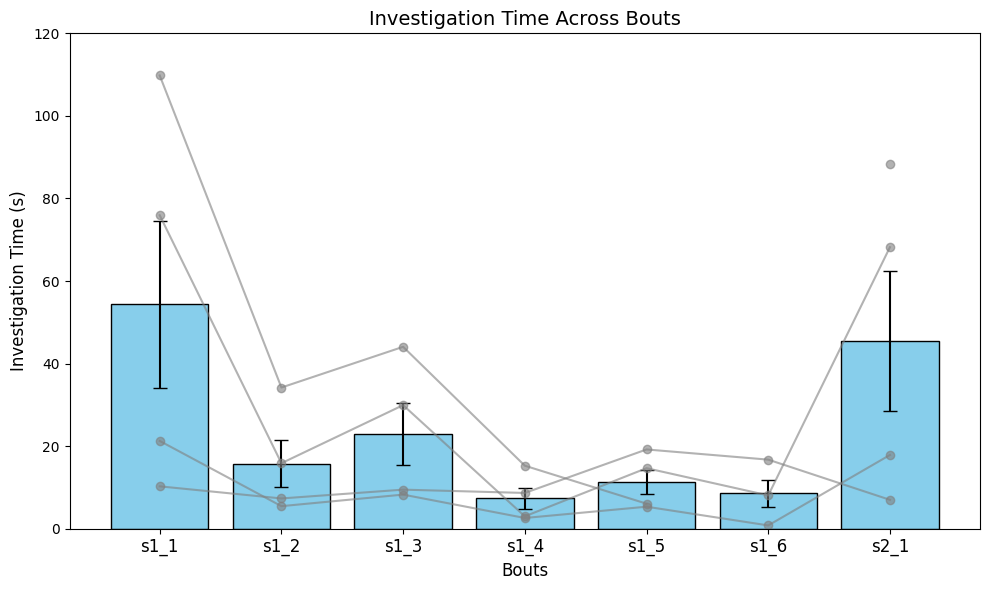

In [5]:
# Define the simplified bout investigation time columns
bouts = ['s1_1', 's1_2', 's1_3', 's1_4', 's1_5', 's1_6', 's2_1']
bout_investigation_columns = [f'Bout_{bout} Investigation Time' for bout in bouts]

# Extracting the data for investigation times from the DataFrame
investigation_times = group_data.hab_dishab_df[bout_investigation_columns].values

# Calculate the mean and SEM for investigation time for each bout across all subjects
mean_investigation_times = np.nanmean(investigation_times, axis=0)
sem_investigation_times = np.nanstd(investigation_times, axis=0) / np.sqrt(len(group_data.hab_dishab_df))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar plot with error bars
ax.bar(bouts, mean_investigation_times, yerr=sem_investigation_times, capsize=5, color='skyblue', edgecolor='black', label='Mean')

# Plot each individual's investigation times and connect the dots between bars
for subject_data in investigation_times:
    ax.plot(bouts, subject_data, marker='o', linestyle='-', color='gray', alpha=0.6, label='_nolegend_')

# Add labels, title, and format
ax.set_ylabel('Investigation Time (s)', fontsize=12)
ax.set_xlabel('Bouts', fontsize=12)
ax.set_ylim(0, 120)
ax.set_title('Investigation Time Across Bouts', fontsize=14)

# Set x-ticks to match the bout labels
ax.set_xticks(np.arange(len(bouts)))
ax.set_xticklabels(bouts, fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

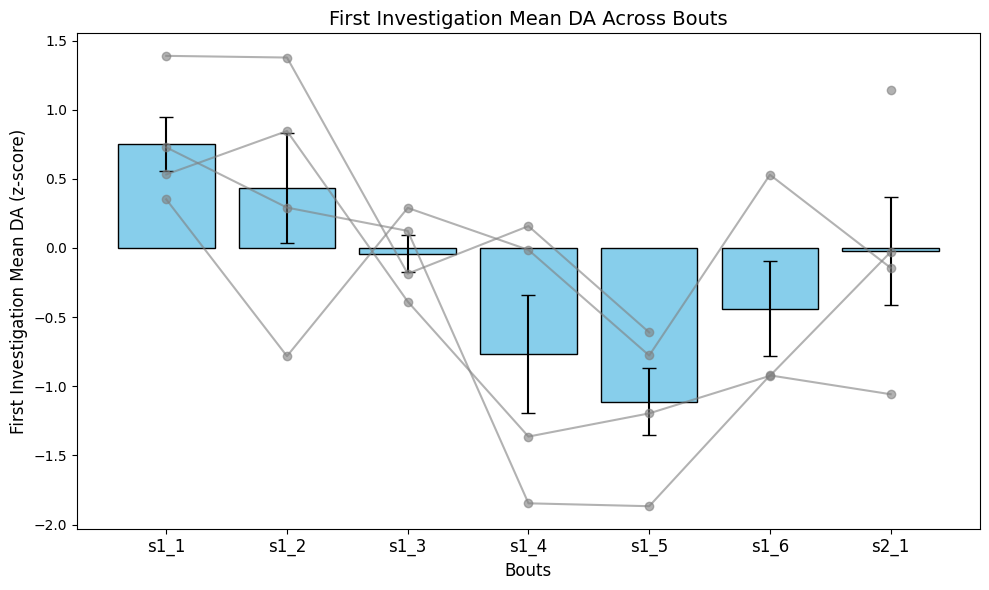

In [6]:
# Define the simplified bout first mean DA columns for investigation
bouts = ['s1_1', 's1_2', 's1_3', 's1_4', 's1_5', 's1_6', 's2_1']
bout_mean_DA_columns = [f'Bout_{bout} First Investigation Mean DA' for bout in bouts]

# Extracting the data for first mean DA values from the DataFrame
mean_DA_values = group_data.hab_dishab_df[bout_mean_DA_columns].values

# Calculate the mean and SEM for first mean DA for each bout across all subjects
mean_first_DA = np.nanmean(mean_DA_values, axis=0)
sem_first_DA = np.nanstd(mean_DA_values, axis=0) / np.sqrt(len(group_data.hab_dishab_df))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar plot with error bars
ax.bar(bouts, mean_first_DA, yerr=sem_first_DA, capsize=5, color='skyblue', edgecolor='black', label='Mean')

# Plot each individual's first DA mean values and connect the dots between bars
for subject_data in mean_DA_values:
    ax.plot(bouts, subject_data, marker='o', linestyle='-', color='gray', alpha=0.6, label='_nolegend_')

# Add labels, title, and format
ax.set_ylabel('First Investigation Mean DA (z-score)', fontsize=12)
ax.set_xlabel('Bouts', fontsize=12)
ax.set_title('First Investigation Mean DA Across Bouts', fontsize=14)

# Set x-ticks to match the bout labels
ax.set_xticks(np.arange(len(bouts)))
ax.set_xticklabels(bouts, fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()
